## Analyze A/B Test Results

You may either submit your notebook through the workspace here, or you may work from your local machine and submit through the next page.  Either way assure that your code passes the project [RUBRIC](https://review.udacity.com/#!/projects/37e27304-ad47-4eb0-a1ab-8c12f60e43d0/rubric).  **Please save regularly.**

This project will assure you have mastered the subjects covered in the statistics lessons.  The hope is to have this project be as comprehensive of these topics as possible.  Good luck!

## Table of Contents
- [Introduction](#intro)
- [Part I - Probability](#probability)
- [Part II - A/B Test](#ab_test)
- [Part III - Regression](#regression)


<a id='intro'></a>
### Introduction

A/B tests are very commonly performed by data analysts and data scientists.  It is important that you get some practice working with the difficulties of these 

For this project, you will be working to understand the results of an A/B test run by an e-commerce website.  Your goal is to work through this notebook to help the company understand if they should implement the new page, keep the old page, or perhaps run the experiment longer to make their decision.

**As you work through this notebook, follow along in the classroom and answer the corresponding quiz questions associated with each question.** The labels for each classroom concept are provided for each question.  This will assure you are on the right track as you work through the project, and you can feel more confident in your final submission meeting the criteria.  As a final check, assure you meet all the criteria on the [RUBRIC](https://review.udacity.com/#!/projects/37e27304-ad47-4eb0-a1ab-8c12f60e43d0/rubric).

<a id='probability'></a>
#### Part I - Probability

To get started, let's import our libraries.

In [86]:
import pandas as pd
import numpy as np
import random
import matplotlib.pyplot as plt
%matplotlib inline
#We are setting the seed to assure you get the same answers on quizzes as we set up
random.seed(42)

`1.` Now, read in the `ab_data.csv` data. Store it in `df`.  **Use your dataframe to answer the questions in Quiz 1 of the classroom.**

a. Read in the dataset and take a look at the top few rows here:

In [87]:
df = pd.read_csv('ab_data.csv')
df.head()

,user_id,timestamp,group,landing_page,converted
0,851104,2017-01-21 22:11:48.556739,control,old_page,0
1,804228,2017-01-12 08:01:45.159739,control,old_page,0
2,661590,2017-01-11 16:55:06.154213,treatment,new_page,0
3,853541,2017-01-08 18:28:03.143765,treatment,new_page,0
4,864975,2017-01-21 01:52:26.210827,control,old_page,1


b. Use the cell below to find the number of rows in the dataset.

In [88]:
print('The number of rows in the dataset : ', df.shape[0])

df.info()

The number of rows in the dataset :  294478
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 294478 entries, 0 to 294477
Data columns (total 5 columns):
user_id         294478 non-null int64
timestamp       294478 non-null object
group           294478 non-null object
landing_page    294478 non-null object
converted       294478 non-null int64
dtypes: int64(2), object(3)
memory usage: 11.2+ MB


c. The number of unique users in the dataset.

In [89]:
print('The number of uniqiue users in the dataset :' ,df['user_id'].nunique())

The number of uniqiue users in the dataset : 290584


d. The proportion of users converted.

In [90]:
print('The proportion of users converted :', df['converted'].mean())

The proportion of users converted : 0.119659193556


e. The number of times the `new_page` and `treatment` don't match.

In [91]:
#Number of times landing page is different when group is treatment
match1 = df.query('landing_page != "new_page" & group =="treatment"')
#Number of times landing page is new page when group is different
match2 = df.query('landing_page == "new_page" & group !="treatment"')
#Total number of times when new page and treatment don't match
match = len(match1)+len(match2)
print('The number of times when new_page and treatment don\'t match : ',match)

The number of times when new_page and treatment don't match :  3893


f. Do any of the rows have missing values?

In [92]:
print('The number of rows with missing value: ',df.isnull().sum())

The number of rows with missing value:  user_id         0
timestamp       0
group           0
landing_page    0
converted       0
dtype: int64


`2.` For the rows where **treatment** does not match with **new_page** or **control** does not match with **old_page**, we cannot be sure if this row truly received the new or old page.  Use **Quiz 2** in the classroom to figure out how we should handle these rows.  

a. Now use the answer to the quiz to create a new dataset that meets the specifications from the quiz.  Store your new dataframe in **df2**.

In [93]:
df2 = df
df2.drop(df2.query('(group == "treatment" & landing_page == "old_page") or (group == "control" & landing_page =="new_page")').index, inplace=True)



In [94]:
# Double Check all of the correct rows were removed - this should be 0
df2[((df2['group'] == 'treatment') == (df2['landing_page'] == 'new_page')) == False].shape[0]

0

`3.` Use **df2** and the cells below to answer questions for **Quiz3** in the classroom.

a. How many unique **user_id**s are in **df2**?

In [95]:
print('The number of unique user_Ids in df2 are : ', df2['user_id'].nunique())

The number of unique user_Ids in df2 are :  290584


b. There is one **user_id** repeated in **df2**.  What is it?

In [96]:
dup_id = df2[df2.duplicated(['user_id'], keep = False)]['user_id'].unique()
print('The repeated user_id is: ' , dup_id)

The repeated user_id is:  [773192]


c. What is the row information for the repeat **user_id**? 

In [97]:
df2[df2.duplicated(['user_id'], keep = False)]

,user_id,timestamp,group,landing_page,converted
1899,773192,2017-01-09 05:37:58.781806,treatment,new_page,0
2893,773192,2017-01-14 02:55:59.590927,treatment,new_page,0


d. Remove **one** of the rows with a duplicate **user_id**, but keep your dataframe as **df2**.

In [98]:
df2.drop_duplicates(['user_id'], inplace = True)

`4.` Use **df2** in the cells below to answer the quiz questions related to **Quiz 4** in the classroom.

a. What is the probability of an individual converting regardless of the page they receive?

In [99]:
print('The probability of an individual converting regardless of the page they view :' ,df2['converted'].mean())

The probability of an individual converting regardless of the page they view : 0.119597087245


b. Given that an individual was in the `control` group, what is the probability they converted?

In [100]:
cont = df2.query('group == "control"').converted.mean()
print('Probability they converted when in control group: ', cont)

Probability they converted when in control group:  0.1203863045


c. Given that an individual was in the `treatment` group, what is the probability they converted?

In [101]:
treat = df2.query('group == "treatment"').converted.mean()
print('Probabilty they converted when in treatment group : ', treat)

Probabilty they converted when in treatment group :  0.118808065515


d. What is the probability that an individual received the new page?

In [102]:
new_page = len(df2.query('landing_page == "new_page"'))
total_page = df2.shape[0]
new_page_prob = new_page/total_page
print('New page probability is: ', new_page_prob)

New page probability is:  0.5000619442226688


e. Consider your results from parts (a) through (d) above, and explain below whether you think there is sufficient evidence to conclude that the new treatment page leads to more conversions.

**From the above results of probability we can observe that an individual in the treatment group or control group have nearly the same value of converted( the difference in these two values is very small) and the probability of an invidual receiving a new page is 50% which makes it difficult to come to any conclusion.**

<a id='ab_test'></a>
### Part II - A/B Test

Notice that because of the time stamp associated with each event, you could technically run a hypothesis test continuously as each observation was observed.  

However, then the hard question is do you stop as soon as one page is considered significantly better than another or does it need to happen consistently for a certain amount of time?  How long do you run to render a decision that neither page is better than another?  

These questions are the difficult parts associated with A/B tests in general.  


`1.` For now, consider you need to make the decision just based on all the data provided.  If you want to assume that the old page is better unless the new page proves to be definitely better at a Type I error rate of 5%, what should your null and alternative hypotheses be?  You can state your hypothesis in terms of words or in terms of **$p_{old}$** and **$p_{new}$**, which are the converted rates for the old and new pages.

**Null hypothesis H0 = Pold >= Pnew or we can also say null hypothesis is H0 is Pnew - Pold <= 0**

**Alternative hypothesis H1 = Pold<Pnew or alternative hypothesis H1 = Pnew - Pold > 0**

`2.` Assume under the null hypothesis, $p_{new}$ and $p_{old}$ both have "true" success rates equal to the **converted** success rate regardless of page - that is $p_{new}$ and $p_{old}$ are equal. Furthermore, assume they are equal to the **converted** rate in **ab_data.csv** regardless of the page. <br><br>

Use a sample size for each page equal to the ones in **ab_data.csv**.  <br><br>

Perform the sampling distribution for the difference in **converted** between the two pages over 10,000 iterations of calculating an estimate from the null.  <br><br>

Use the cells below to provide the necessary parts of this simulation.  If this doesn't make complete sense right now, don't worry - you are going to work through the problems below to complete this problem.  You can use **Quiz 5** in the classroom to make sure you are on the right track.<br><br>

a. What is the **conversion rate** for $p_{new}$ under the null? 

In [103]:
pnew = df2['converted'].mean()
print ('The conversion rate for pnew is : ', pnew)

The conversion rate for pnew is :  0.119597087245


b. What is the **conversion rate** for $p_{old}$ under the null? <br><br>

In [104]:
pold = df2['converted'].mean()
print('The conversion rate for pold is : ', pold)

The conversion rate for pold is :  0.119597087245


c. What is $n_{new}$, the number of individuals in the treatment group?

In [105]:
#Number of individuals in the treatment group
nnew = len(df2.query('group == "treatment"'))
print ('The number of individuals in the treatment group is : ' , nnew)

The number of individuals in the treatment group is :  145310


d. What is $n_{old}$, the number of individuals in the control group?

In [106]:
#Number of individuals in the control group
nold = len(df2.query('group == "control"'))
print ('The number of individuals in the control group is : ', nold)

The number of individuals in the control group is :  145274


e. Simulate $n_{new}$ transactions with a conversion rate of $p_{new}$ under the null.  Store these $n_{new}$ 1's and 0's in **new_page_converted**.

In [107]:
#Simulating nnew transactios with a pnew conversion rate using random.binomial (random sampling and binomial distribution)

new_page_converted = np.random.binomial(1,pnew,nnew)

f. Simulate $n_{old}$ transactions with a conversion rate of $p_{old}$ under the null.  Store these $n_{old}$ 1's and 0's in **old_page_converted**.

In [108]:
#Simulating nnew transactios with a pnew conversion rate using random.binomial (random sampling and binomial distribution)

old_page_converted = np.random.binomial(1,pold,nold)

g. Find $p_{new}$ - $p_{old}$ for your simulated values from part (e) and (f).

In [109]:
#finding the new probabiliity and their difference
#reducing new page to the size of old page
new_page_converted = new_page_converted[:145274]
pnew1 = new_page_converted/nnew
pold1 = old_page_converted/nold
p_diff1 = pnew1 - pold1
print('The difference between pnew and pold is: ', p_diff1)

The difference between pnew and pold is:  [  0.00000000e+00   0.00000000e+00   6.88183883e-06 ...,  -6.88354420e-06
   0.00000000e+00  -6.88354420e-06]


h. Create 10,000 $p_{new}$ - $p_{old}$ values using the same simulation process you used in parts (a) through (g) above. Store all 10,000 values in a NumPy array called **p_diffs**.

In [110]:
#finding the difference between pnew and pold for 10000 samples and storing it in an array called p_diffs
p_diff= []

for _ in range(10000):
    new_page_converted = np.random.binomial(1,pnew,nnew)
    old_page_converted = np.random.binomial(1,pold,nold)
    pnew2 = new_page_converted.mean()
    pold2 = old_page_converted.mean()
    p_diff.append(pnew2 - pold2)

i. Plot a histogram of the **p_diffs**.  Does this plot look like what you expected?  Use the matching problem in the classroom to assure you fully understand what was computed here.

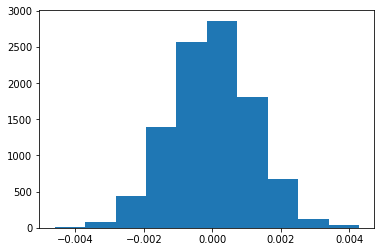

In [111]:
#plotting the histogram to see if it is normally distributed
plt.hist(p_diff);

j. What proportion of the **p_diffs** are greater than the actual difference observed in **ab_data.csv**?

In [112]:
#Finding the actual difference
actual_new = df2[df2['group']=='treatment']['converted'].mean()
actual_old = df2[df2['group']=='control']['converted'].mean()
actual = actual_new - actual_old
print('The actual difference is: ' ,actual)

The actual difference is:  -0.00157823898536


In [113]:
p_diff = np.array(p_diff)
(p_diff > actual).mean()

0.90539999999999998

k. Please explain using the vocabulary you've learned in this course what you just computed in part **j.**  What is this value called in scientific studies?  What does this value mean in terms of whether or not there is a difference between the new and old pages?

**We are trying to find if the null hypothesis is true by checking the difference of statistic(the difference between old page and new page) is equal to zero or in other word condition is satisfied. If this is not satisfied then it means alternative hypothesis is satisfied**.

**Actual(the parameter) in part j is the difference obtained between the new page and the old page from the population whereas p_diff_range(the parameter) is the simulated difference between new page and old page for 10000 samples.** 

**From the above value we can see that it is true which means that the old page performs as well as the new page and there is no advantage of converting to a new page**

l. We could also use a built-in to achieve similar results.  Though using the built-in might be easier to code, the above portions are a walkthrough of the ideas that are critical to correctly thinking about statistical significance. Fill in the below to calculate the number of conversions for each page, as well as the number of individuals who received each page. Let `n_old` and `n_new` refer the the number of rows associated with the old page and new pages, respectively.

In [114]:
import statsmodels.api as sm

convert_old = sum(df2.query('group == "control"')['converted'])
convert_new = sum(df2.query('group == "treatment"')['converted'])
n_old = len(df2.query('group == "control"')['user_id'])
n_new = len(df2.query('group =="treatment"')['user_id'])

m. Now use `stats.proportions_ztest` to compute your test statistic and p-value.  [Here](https://docs.w3cub.com/statsmodels/generated/statsmodels.stats.proportion.proportions_ztest/) is a helpful link on using the built in.

In [120]:
#z-score and p-value
z_score, p_value = sm.stats.proportions_ztest([convert_new, convert_old], [n_old,n_new], alternative='smaller')
print('z_score : ', z_score)
print('p-value : ', p_value)

z_score :  -1.26169574219
p-value :  0.103529144803


n. What do the z-score and p-value you computed in the previous question mean for the conversion rates of the old and new pages?  Do they agree with the findings in parts **j.** and **k.**?

**From part j and k we saw that that the p-value in the difference between the two pages was zero and in part m we see that the z-score is negtaive and the p-value is 0.1 which suggests that we must accpet the null hypothesis**

<a id='regression'></a>
### Part III - A regression approach

`1.` In this final part, you will see that the result you achieved in the A/B test in Part II above can also be achieved by performing regression.<br><br> 

a. Since each row is either a conversion or no conversion, what type of regression should you be performing in this case?

**We need to perform Logistic Regression**

b. The goal is to use **statsmodels** to fit the regression model you specified in part **a.** to see if there is a significant difference in conversion based on which page a customer receives. However, you first need to create in df2 a column for the intercept, and create a dummy variable column for which page each user received.  Add an **intercept** column, as well as an **ab_page** column, which is 1 when an individual receives the **treatment** and 0 if **control**.

In [116]:
df2['intercept'] =1
df2[['control', 'ab_page']] = pd.get_dummies(df2['group'])
df2.drop(labels = ['control'], axis = 1, inplace = True)


c. Use **statsmodels** to instantiate your regression model on the two columns you created in part b., then fit the model using the two columns you created in part **b.** to predict whether or not an individual converts. 

In [117]:
lm = sm.Logit(df2['converted'], df2[['intercept', 'ab_page']])
results = lm.fit()

Optimization terminated successfully.
         Current function value: 0.366118
         Iterations 6


d. Provide the summary of your model below, and use it as necessary to answer the following questions.

In [118]:
#Finding the fit and result 
import scipy.stats as stats
stats.chisqprob = lambda chisq, df: stats.chi2.sf(chisq, df)
results.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                           Logit Regression Results                           
==============================================================================
Dep. Variable:              converted   No. Observations:               290584
Model:                          Logit   Df Residuals:                   290582
Method:                           MLE   Df Model:                            1
Date:                Sat, 27 Jun 2020   Pseudo R-squ.:               8.077e-06
Time:                        23:01:28   Log-Likelihood:            -1.0639e+05
converged:                       True   LL-Null:                   -1.0639e+05
                                        LLR p-value:                    0.1899
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
intercept     -1.9888      0.008   -246.669      0.000      -2.005      -1.973
ab_page       -0.0150      0.011     -1.311      0.190      -0.037       0.007
==============================================================================
"""

e. What is the p-value associated with **ab_page**? Why does it differ from the value you found in **Part II**?<br><br>  **Hint**: What are the null and alternative hypotheses associated with your regression model, and how do they compare to the null and alternative hypotheses in **Part II**?

**The p-value associated with ab_page is 0.190. In part II, we were checking if the null hypotheses was true, in other words if the difference between new page and old page was zero. In this case, we are are checking if the difference sqaures between the old page and the new page is not zero. 
The null hypothesis associated with this regression model is 
H0 = Pnew - Pold = 0 and the alternative hypothesis associated with the regression model is H1 = Pnew - Pold !=0**

f. Now, you are considering other things that might influence whether or not an individual converts.  Discuss why it is a good idea to consider other factors to add into your regression model.  Are there any disadvantages to adding additional terms into your regression model?

**There maybe other factors that influence the converts. In our dataset, timestamp is provided but we have never used. We can use the timestamp to check at what time an individual uses the internet. There may be other practical significant factors such as age, gender, geographic location and occupation that can influence the converts but are not being considered. The disadvantage of adding such additional terms into the regression model is that it can contradict the results that we have already found or it can require additional factors to be determined that control them further.**

g. Now along with testing if the conversion rate changes for different pages, also add an effect based on which country a user lives in. You will need to read in the **countries.csv** dataset and merge together your datasets on the appropriate rows.  [Here](https://pandas.pydata.org/pandas-docs/stable/generated/pandas.DataFrame.join.html) are the docs for joining tables. 

Does it appear that country had an impact on conversion?  Don't forget to create dummy variables for these country columns - **Hint: You will need two columns for the three dummy variables.** Provide the statistical output as well as a written response to answer this question.

In [121]:
#Read the country document 
df_countries = pd.read_csv('countries.csv')
df_countries.head()

,user_id,country
0,834778,UK
1,928468,US
2,822059,UK
3,711597,UK
4,710616,UK


In [122]:
#Choose those id's that are available in both the datasets
df3 = df_countries.set_index('user_id').join(df2.set_index('user_id'), how = 'inner')
df3.head()

,country,timestamp,group,landing_page,converted,intercept,ab_page
user_id,,,,,,,
834778,UK,2017-01-14 23:08:43.304998,control,old_page,0,1,0
928468,US,2017-01-23 14:44:16.387854,treatment,new_page,0,1,1
822059,UK,2017-01-16 14:04:14.719771,treatment,new_page,1,1,1
711597,UK,2017-01-22 03:14:24.763511,control,old_page,0,1,0
710616,UK,2017-01-16 13:14:44.000513,treatment,new_page,0,1,1


In [123]:
#Finding out the countries present in the dataset
df3['country'].value_counts()

US    203619
UK     72466
CA     14499
Name: country, dtype: int64

In [124]:
#Creating dummy variables columns
df3[['US', 'UK','CA']] = pd.get_dummies(df3['country'])
df_final = df3
df_final.head()

,country,timestamp,group,landing_page,converted,intercept,ab_page,US,UK,CA
user_id,,,,,,,,,,
834778,UK,2017-01-14 23:08:43.304998,control,old_page,0,1,0,0,1,0
928468,US,2017-01-23 14:44:16.387854,treatment,new_page,0,1,1,0,0,1
822059,UK,2017-01-16 14:04:14.719771,treatment,new_page,1,1,1,0,1,0
711597,UK,2017-01-22 03:14:24.763511,control,old_page,0,1,0,0,1,0
710616,UK,2017-01-16 13:14:44.000513,treatment,new_page,0,1,1,0,1,0


In [125]:
#Obtaining the results and summary keeping Canada as constant

lm2 = sm.Logit(df_final['converted'], df_final[['intercept','UK', 'US']])
results2 = lm2.fit()
results2.summary()

Optimization terminated successfully.
         Current function value: 0.366116
         Iterations 6


<class 'statsmodels.iolib.summary.Summary'>
"""
                           Logit Regression Results                           
==============================================================================
Dep. Variable:              converted   No. Observations:               290584
Model:                          Logit   Df Residuals:                   290581
Method:                           MLE   Df Model:                            2
Date:                Sat, 27 Jun 2020   Pseudo R-squ.:               1.521e-05
Time:                        23:33:07   Log-Likelihood:            -1.0639e+05
converged:                       True   LL-Null:                   -1.0639e+05
                                        LLR p-value:                    0.1984
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
intercept     -1.9967      0.007   -292.314      0.000      -2.010      -1.983
UK             0.0099      0.013      0.746      0.456      -0.016       0.036
US            -0.0408      0.027     -1.518      0.129      -0.093       0.012
==============================================================================
"""

h. Though you have now looked at the individual factors of country and page on conversion, we would now like to look at an interaction between page and country to see if there significant effects on conversion.  Create the necessary additional columns, and fit the new model.  

Provide the summary results, and your conclusions based on the results.

In [126]:
#Obtaining the fit and summary keeping Canada as constant and page on conversion
lm3 = sm.Logit(df_final['converted'],df_final[['intercept', 'UK', 'US','ab_page']])
results3 = lm3.fit()
results3.summary()

Optimization terminated successfully.
         Current function value: 0.366113
         Iterations 6


<class 'statsmodels.iolib.summary.Summary'>
"""
                           Logit Regression Results                           
==============================================================================
Dep. Variable:              converted   No. Observations:               290584
Model:                          Logit   Df Residuals:                   290580
Method:                           MLE   Df Model:                            3
Date:                Sat, 27 Jun 2020   Pseudo R-squ.:               2.323e-05
Time:                        23:33:58   Log-Likelihood:            -1.0639e+05
converged:                       True   LL-Null:                   -1.0639e+05
                                        LLR p-value:                    0.1760
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
intercept     -1.9893      0.009   -223.763      0.000      -2.007      -1.972
UK             0.0099      0.013      0.743      0.457      -0.016       0.036
US            -0.0408      0.027     -1.516      0.130      -0.093       0.012
ab_page       -0.0149      0.011     -1.307      0.191      -0.037       0.007
==============================================================================
"""

### Conclusion
**From the above regression, the p-value of ab_page has been 0.19 and the p-value for UK is more than US**. 

**Statistically, we can retain the old page. In other words, we can accept null hypothesis and reject alternative hypothesis. This is because there is no significant difference in conversion from control to treatment group**

**We can draw this conclusion based on the dataset available. Practically, there could be other factors such as cost and time spent on the deployment of the new page or in maintaining the old page which are not considered.**

In [2]:
from subprocess import call
call(['python', '-m', 'nbconvert', 'Analyze_ab_test_results_notebook.ipynb'])

0